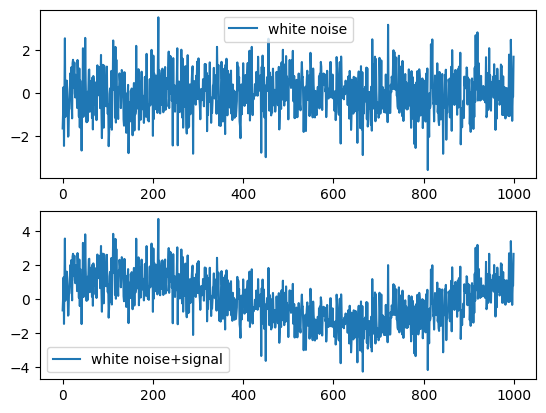

In [19]:
import numpy as np
import matplotlib.pyplot as plt


t           = np.arange(0,1000,1)
T           = np.size(t)
white_noise = np.random.normal(0, 1, size=1000)
raw         = white_noise + np.cos(2*t*np.pi/(T+1)) + np.sin(2*t*np.pi/(T+1))

plt.subplot(2,1,1)
plt.plot(white_noise,label='white noise')
plt.legend()
plt.subplot(2,1,2)
plt.plot(raw,label='white noise+signal')
plt.legend()

In [20]:
#
def Fourier(x):
    T           = np.size(x)
    n           = np.matrix(np.arange(0,T,1))
    t           = np.matrix((0+1j)*2*np.pi*np.arange(0,T,1)/(T+1))
    w           = np.exp(t.T*n)
    C_k         = w*np.matrix(x).T/(T+1)
    A_k         = np.real(C_k[np.argmax(np.multiply(C_k,C_k.conjugate()))])*2
    B_k         = np.imag(C_k[np.argmax(np.multiply(C_k,C_k.conjugate()))])*2

    return A_k,B_k


In [21]:
#--------- define function ------------#

def fourier(x, number_of_harmonics):
    x = np.squeeze(x)
    time_series = np.zeros((np.size(x),number_of_harmonics))
    for i in range(0,number_of_harmonics):
        time_series[:,i-1] = np.arange(0,np.size(x))/np.size(x)*2*i*np.pi
    cos_coef    = np.matmul(np.transpose(np.cos(time_series)),x)/len(x)*2
    sin_coef    = np.matmul(np.transpose(np.sin(time_series)),x)/len(x)*2
    #reconstruct = (np.matmul(np.cos(time_series),cos_coef)+np.matmul(np.sin(time_series),sin_coef))/np.size(x)*2
    return cos_coef,sin_coef

In [22]:
A_k,B_k = Fourier(raw)
print('A_k='+str(A_k))
print('B_k='+str(B_k))

A_k,B_k = fourier(raw,2)
print('A_k='+str(A_k))
print('B_k='+str(B_k))


A_k=[[0.95599697]]
B_k=[[1.03714427]]
A_k=[ 0.95409151 -0.02596164]
B_k=[1.04076305 0.        ]


A_k=[[1.02591401]]
B_k=[[1.04390522]]
takes：0.157139 seconds


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 100.0)

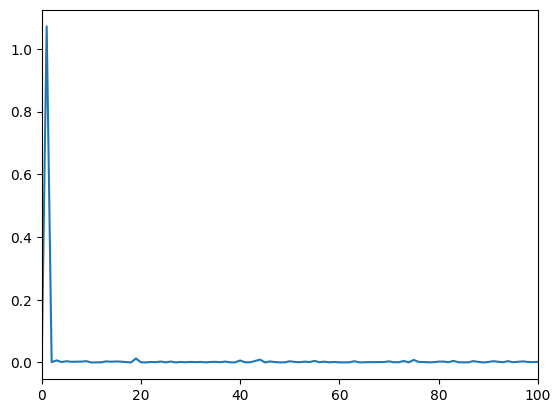

In [ ]:
import time
start = time.process_time()

n   = np.matrix(np.arange(0,1000,1))
t   = np.matrix((0+1j)*2*np.pi*np.arange(0,1000,1)/(T+1))
w   = np.exp(t.T*n)
C_k = w*np.matrix(raw).T/(T+1)
end = time.process_time()

A_k = np.real(C_k[np.argmax(np.multiply(C_k,C_k.conjugate()))])*2
B_k = np.imag(C_k[np.argmax(np.multiply(C_k,C_k.conjugate()))])*2
print('A_k='+str(A_k))
print('B_k='+str(B_k))

# 輸出結果
print("takes：%f seconds" % (end - start))
plt.plot(np.multiply(C_k,C_k.conjugate())*2)
plt.xlim([0,100])

In [ ]:
C_k[np.argmax(np.multiply(C_k,C_k.conjugate()))]
A_k = np.real(C_k[np.argmax(np.multiply(C_k,C_k.conjugate()))])*2
B_k = np.imag(C_k[np.argmax(np.multiply(C_k,C_k.conjugate()))])*2
print('A_k='+str(A_k))
print('B_k='+str(B_k))

A_k=[[0.00688107]]
B_k=[[1.01469032]]


takes：0.000210 seconds


(0.0, 100.0)

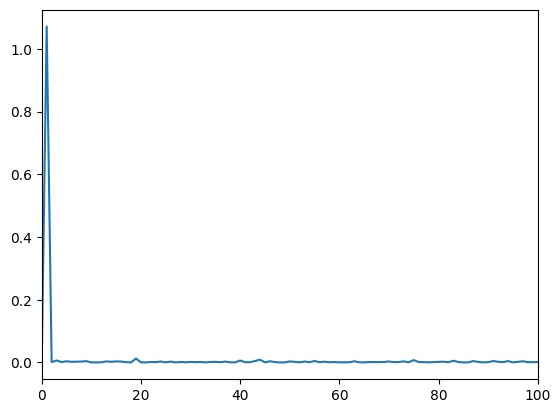

In [ ]:
import time
start = time.process_time()
C_k = np.fft.fft(raw)
end = time.process_time()
print("takes：%f seconds" % (end - start))
plt.plot(np.multiply(C_k,C_k.conjugate())/(T+1)**2*2)
plt.xlim([0,100])

In [ ]:
A_k = np.real(C_k[np.argmax(np.multiply(C_k,C_k.conjugate()))])*2/(T+1)
B_k = np.imag(C_k[np.argmax(np.multiply(C_k,C_k.conjugate()))])*2/(T+1)

print('A_k='+str(A_k))
print('B_k='+str(B_k))

A_k=1.0232324527280554
B_k=-1.0465619400641786
